In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
train_set = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      transform=transforms.ToTensor(),
                                      download=True)

test_set = torchvision.datasets.MNIST(root='./data',
                                     train = False,
                                     transform=transforms.ToTensor(),
                                     download=True)

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                          batch_size=64,
                                          shuffle=True
                                           )

test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                         batch_size=64,
                                         shuffle=False
                                         )

# Encoder
- Encoder : Dense(784 -> 128), Dense(128 -> 64), Dense(64 -> 32)
- Decoder : Dense(32 -> 64), Dense(64 -> 128), Dense(128 -> 784)

In [5]:
# Encoder : Dense(784 -> 128), Dense(128 -> 64), Dense(64 -> 32)
# Decoder : Dense(32 -> 64), Dense(64 -> 128), Dense(128 -> 784)

In [6]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(784,128),
            nn.ReLU(),

            nn.Linear(128,64),
            nn.ReLU(),

            nn.Linear(64,32),
        )


        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32,64),
            nn.ReLU(),

            nn.Linear(64,128),
            nn.ReLU(),

            nn.Linear(128,784),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded, encoded



In [7]:
model = AE().to(device)
print(model)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=784, bias=True)
  )
)


In [10]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training

epochs = 10
for epoch in range(epochs):
    for data in train_loader:
        inputs, _ = data # 이미지느 필요한데 라벨은 필요없음
        # print(inputs.shape)
        inputs = inputs.view(inputs.size(0), -1) # reshpae과 유사.
        # print(inputs.shape)

        optimizer.zero_grad()
        outputs, _ = model(inputs)


        loss = loss_fn(outputs, inputs)

        loss.backward()
        optimizer.step()
    print(f"epoch {epoch}, loss {loss}")
print("finished")


epoch 0, loss 0.022570323199033737
epoch 1, loss 0.017619527876377106
epoch 2, loss 0.016662368550896645
epoch 3, loss 0.016625259071588516
epoch 4, loss 0.014757398515939713
epoch 5, loss 0.013493170961737633
epoch 6, loss 0.016435831785202026
epoch 7, loss 0.014212158508598804
epoch 8, loss 0.013514074496924877
epoch 9, loss 0.011400718241930008
finished


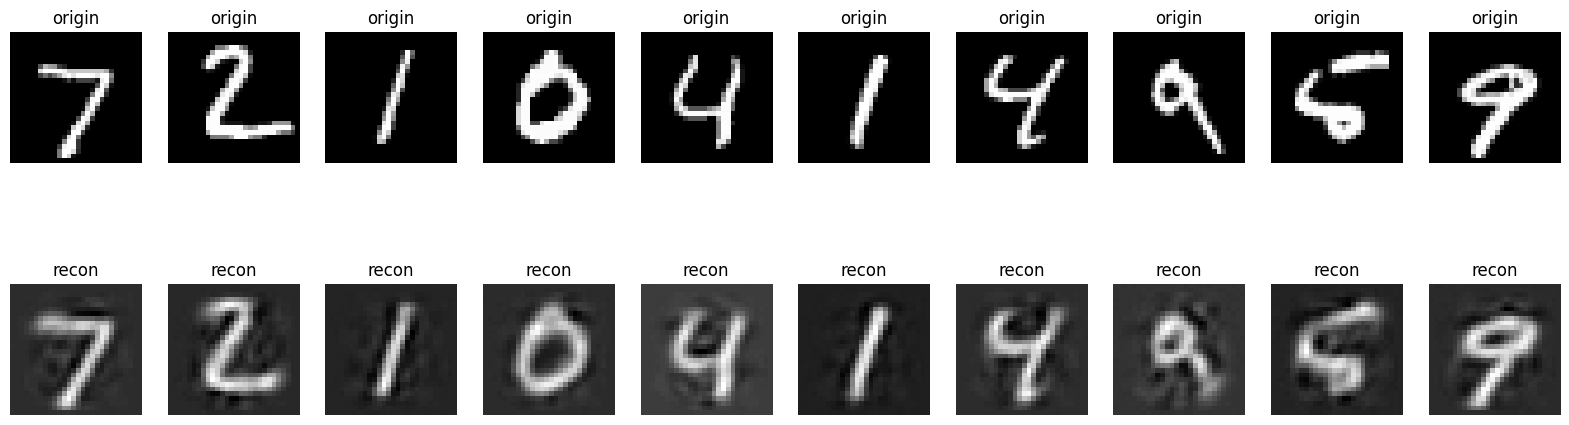

In [24]:
import matplotlib.pyplot as plt

images, labels = next(iter(test_loader))

images_flat = images.view(images.size(0), -1) # 이미지 플래튼하고


# encoded2 = model.encoder(images_flat)
# decoded2 = model.decoder(encoded2)


recon_images_flat, encoded = model(images_flat) # 디코딩해서 나온 사진(원본과 비교하기위해서) 플랫튼형태임
recon_images = recon_images_flat.view(images.size()) # 플랫튼된 것을 다시 [배치,1,28,28]로 바꿈


n_imgs = 10
plt.figure(figsize=(20, 6))
for i in range(n_imgs):
    ax = plt.subplot(2, n_imgs, i + 1)
    plt.imshow(images[i].squeeze().numpy(), cmap='gray')  # 원본
    ax.set_title('origin')
    ax.axis("off")

    ax = plt.subplot(2, n_imgs, n_imgs + i + 1)
    plt.imshow(recon_images[i].detach().squeeze().numpy(), cmap='gray')  # 재구성
    ax.set_title("recon")
    ax.axis("off")

plt.show()

In [26]:
print(images.size())
print(recon_images_flat.shape)
print(recon_images.size())
##중간중간에 사이즈 확인하면서 코딩하기
print(images[0].numpy().shape)
# chw:120 -> hwc -> hw


torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
(1, 28, 28)


In [ ]:
class CNNAE(nn.Module):
    def __init__(self):
        super(CNNAE, self).__init__()
        #encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),#사이즈를 키우면서 컨볼루션
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded


device: mps
[01/10] loss: 0.037287
[02/10] loss: 0.005886
[03/10] loss: 0.004418
[04/10] loss: 0.003832
[05/10] loss: 0.003483
[06/10] loss: 0.003252
[07/10] loss: 0.003082
[08/10] loss: 0.002949
[09/10] loss: 0.002841
[10/10] loss: 0.002750
finished


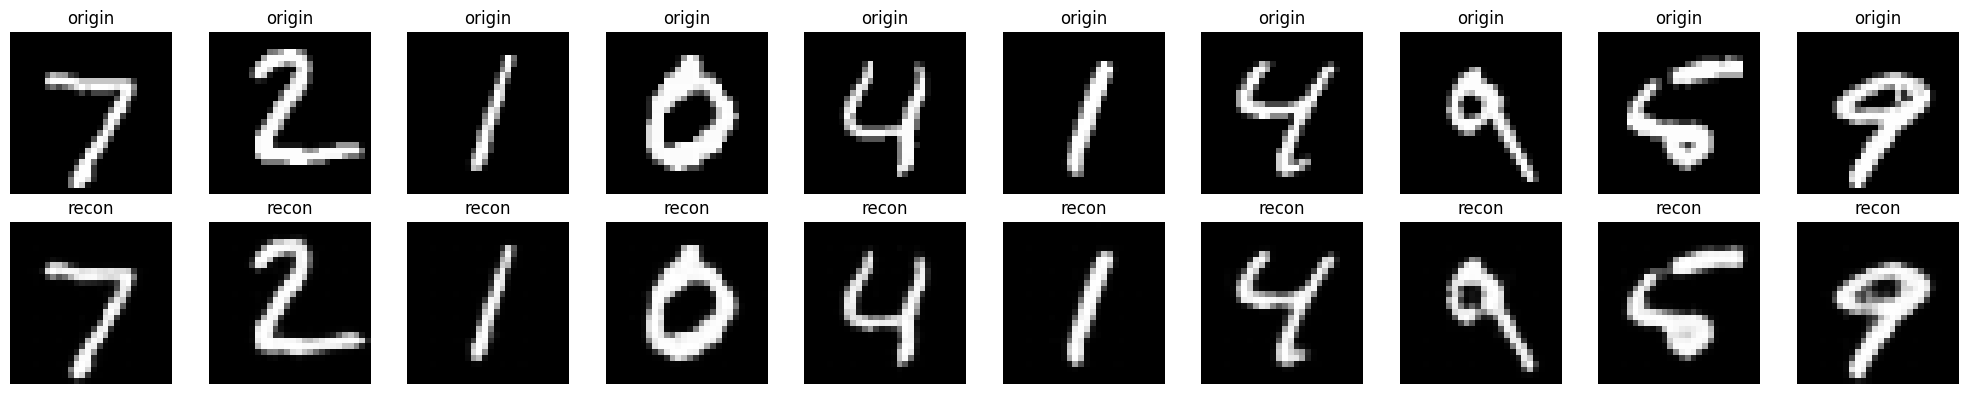

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt

# -----------------------
# 0) Device
# -----------------------
device = (
    "cuda" if torch.cuda.is_available()
    else ("mps" if hasattr(torch.backends, "mps") and torch.backends.mps.is_available() else "cpu")
)
print("device:", device)

# -----------------------
# 1) Dataset / DataLoader
# -----------------------
transform = T.ToTensor()

trainset = torchvision.datasets.MNIST(
    root="./data", train=True, transform=transform, download=True
)
testset = torchvision.datasets.MNIST(
    root="./data", train=False, transform=transform, download=True
)

train_loader = DataLoader(trainset, batch_size=128, shuffle=True)
test_loader = DataLoader(testset, batch_size=128, shuffle=False)

# -----------------------
# 2) Model (CNN Autoencoder)
#    padding=1 로 바꿔서 28->14->7 -> 14 -> 28로 정확히 복원되게 함
# -----------------------
class CNNAE(nn.Module):
    def __init__(self):
        super(CNNAE, self).__init__()
        # Encoder: 28x28 -> 14x14 -> 7x7
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # 28x28 유지
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),       # 14x14
            nn.Conv2d(16, 32, kernel_size=3, padding=1), # 14x14 유지
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)        # 7x7
        )
        # Decoder: 7x7 -> 14x14 -> 28x28
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),  # 7->14
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),   # 14->28
            nn.Sigmoid()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

model = CNNAE().to(device)

# -----------------------
# 3) Loss / Optimizer
# -----------------------
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# -----------------------
# 4) Train
#    (중요) 입력을 절대 flatten 하지 말 것. [B,1,28,28]을 그대로 사용
# -----------------------
epochs = 10
model.train()
for epoch in range(1, epochs+1):
    running_loss = 0.0
    for inputs, _ in train_loader:
        inputs = inputs.to(device)              # [B,1,28,28]
        optimizer.zero_grad()
        outputs, _ = model(inputs)              # outputs: [B,1,28,28]
        loss = loss_fn(outputs, inputs)         # 타깃도 동일한 모양
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"[{epoch:02d}/{epochs}] loss: {epoch_loss:.6f}")

print("finished")

# -----------------------
# 5) Visualize: 원본 vs 복원
# -----------------------
model.eval()
with torch.no_grad():
    images, _ = next(iter(test_loader))
    images = images.to(device)
    recon, _ = model(images)

# 첫 10개 비교
n_imgs = 10
plt.figure(figsize=(20, 4))
for i in range(n_imgs):
    # 원본
    ax = plt.subplot(2, n_imgs, i + 1)
    ax.imshow(images[i].detach().cpu().squeeze().numpy(), cmap='gray')
    ax.set_title("origin")
    ax.axis("off")
    # 복원
    ax = plt.subplot(2, n_imgs, n_imgs + i + 1)
    ax.imshow(recon[i].detach().cpu().squeeze().numpy(), cmap='gray')
    ax.set_title("recon")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
model = CNNAE().to(device)
print(model)